In [5]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

# Display the first few rows of each dataframe
train_df.head(), gender_submission_df.head()


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [6]:
# Check for missing values and data types
train_df.info()

# Get basic statistics of the training data
train_df.describe()

# Check for missing values and data types in the gender submission dataframe
gender_submission_df.info()
gender_submission_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     41

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [7]:
# Handle missing values
# Fill missing 'Age' values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to a high number of missing values
train_df.drop(columns=['Cabin'], inplace=True)

# Convert 'Sex' and 'Embarked' columns to categorical type
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')

# Verify changes
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 64.8+ KB


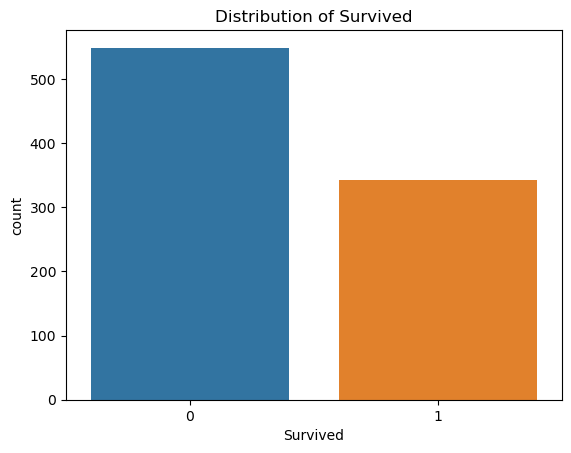

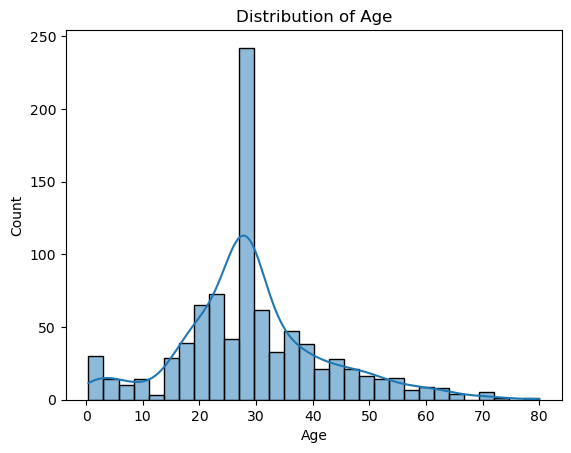

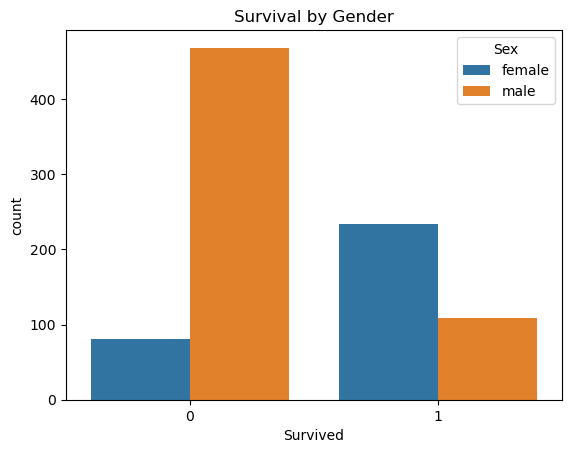

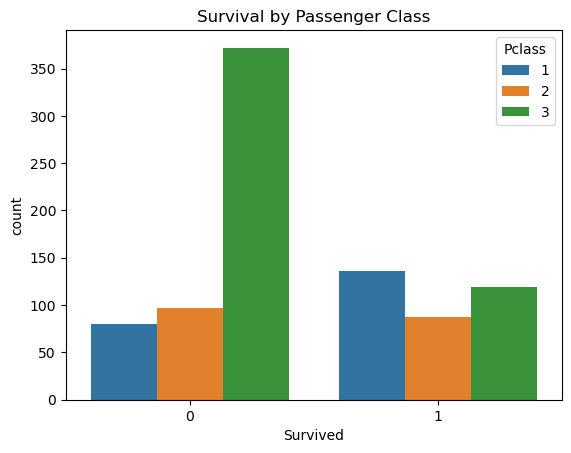

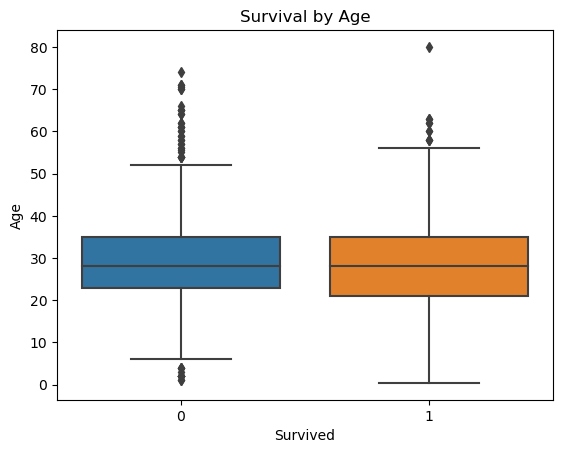

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'Survived'
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survived')
plt.show()

# Plot the distribution of 'Age'
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Explore the relationship between 'Sex' and 'Survived'
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

# Explore the relationship between 'Pclass' and 'Survived'
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

# Explore the relationship between 'Age' and 'Survived'
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Survival by Age')
plt.show()
